Sentiment analysis: This AL Model is used to perform sentiment analysis on customer reviews and identify positive ,neutral and negative sentiments(multi class classification) associated with various products.Using Natural learning process(NLP)Techniques to classify customer review based on product data.This could help businesses to improve their product offerings and customer service

problem statement 
 Many e-commerce companies face challenges in understanding customer satisfaction because of missing or unstructured product reviews. Without clear feedback, businesses may struggle to improve their offerings, leading to decreased customer retention and revenue loss. Sentiment analysis helps identify whether feedback is positive,Neutal or negative, offering actionable insights for improving both products and customer service.


In [2]:
#import required libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loaded my dataset,but the default enconde could not read because of some special symbols in my data 
#so i have to use 'latin 1'
df = pd.read_csv("C:/Users/VAPLEX/Desktop/LUKE FAVOUR PROJECT/flipkart_product.csv", encoding='latin1')




In [4]:
#Show the first few rows
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [5]:
#show the last few rows
df.tail()
#i have missing values in my dataset

,ProductName,Price,Rate,Review,Summary
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good
189873,,NaN,NaN,NaN,NaN


In [6]:
 #How manys rows and column
#189874 rows,5 column
df.shape

(189874, 5)

In [7]:
#from the data my data type is object which is also a text datatype,but my rate is a number which i will change the datatype
#i also have inconsistent non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [8]:
#Droping the column i won't be using,so i can clean my dataset properly
df = df.drop(columns=["Price", "Summary"])


In [9]:
#i will be using 3 columns to train my model
df.head()

,ProductName,Rate,Review
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,Super!
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5,Awesome
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3,Fair
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,1,Useless product
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3,Fair


In [10]:
#Replacing 0 with nan and checking for missing values
invalid_cols = ['ProductName', 'Rate', 'Review',]
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)
df.isnull().sum()

ProductName    0
Rate           1
Review         4
dtype: int64

In [11]:
#Drop the missing values
df = df.dropna()


In [12]:
#I have 189870 rows and 3 colums after removing missing values
df.isnull().sum()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189870 entries, 0 to 189872
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189870 non-null  object
 1   Rate         189870 non-null  object
 2   Review       189870 non-null  object
dtypes: object(3)
memory usage: 5.8+ MB


(189870, 3)

In [13]:
df = df.reset_index(drop=True)


In [14]:
df.tail()

,ProductName,Rate,Review
189865,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5,Terrific
189866,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5,Terrific
189867,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5,Terrific
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",5,Just wow!
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",4,Worth the money


In [15]:
# Convert 'Rate' to float (handle errors too)
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')


In [16]:
#change my text columns to string
df["Review"] = df["Review"].astype(str)
df["ProductName"] = df["ProductName"].astype(str)


In [17]:
print(df.dtypes)


ProductName     object
Rate           float64
Review          object
dtype: object


In [18]:
#created a column sentiment for my target variable and label it from rating
def label_sentiment_from_Rating(rate):
    if rate >= 4.0:
        return 'Positive'
    elif rate == 3.0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the column name 'Rate'
df['sentiment'] = df['Rate'].apply(label_sentiment_from_Rating)

# Show the result
print(df[['Rate', 'sentiment']].head())


   Rate sentiment
0   5.0  Positive
1   5.0  Positive
2   3.0   Neutral
3   1.0  Negative
4   3.0   Neutral


In [19]:
df.head()

,ProductName,Rate,Review,sentiment
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5.0,Super!,Positive
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,5.0,Awesome,Positive
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3.0,Fair,Neutral
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,1.0,Useless product,Negative
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3.0,Fair,Neutral


In [20]:
#removed duplicate so my model can train well
df = df.drop_duplicates().reset_index(drop=True)


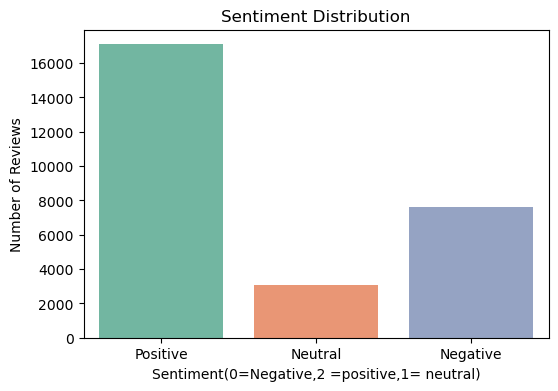

In [21]:
#DATA VISUALIZATION
#using Bar chart to check the distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment(0=Negative,2 =positive,1= neutral)')
plt.ylabel('Number of Reviews')
plt.show()


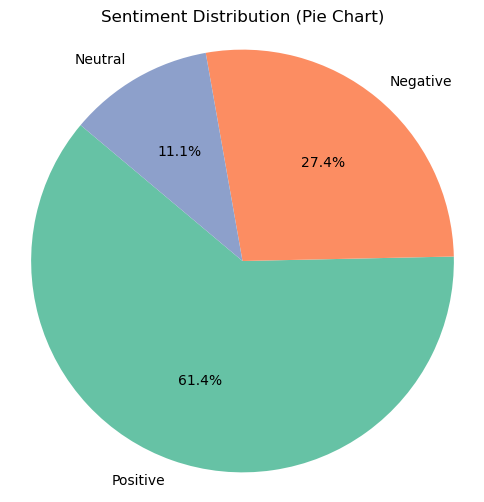

In [22]:
#pie chart to check the sentiment distributions
#my distribution is imbalance
# Count the sentiments
sentiment_counts = df['sentiment'].value_counts()
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2')
)
plt.title('Sentiment Distribution (Pie Chart)')
plt.axis('equal')  
plt.show()


In [23]:
#show how many count i have in my distribution
print("Sentiment distribution:\n", df['sentiment'].value_counts())


Sentiment distribution:
 Positive    17095
Negative     7636
Neutral      3089
Name: sentiment, dtype: int64


In [24]:
#cleaning my text(review)before training
#import the required libaries useful for cleaning the text
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [25]:
#Downloded some packages fron nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VAPLEX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VAPLEX\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\VAPLEX\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
#Cleaning my text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_review(text):
    if pd.isnull(text):
        return ""

    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords + lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)


In [27]:
df['clean_review'] = df['Review'].apply(clean_review)


In [28]:
#show the sample rows that has dirty text to a clean text
print(df[['Review', 'clean_review']].sample(5))


                       Review          clean_review
17550                Moderate              moderate
5198        Absolute rubbish!      absolute rubbish
20952        Perfect product!       perfect product
15383  Don't waste your money      dont waste money
13630   Mind-blowing purchase  mindblowing purchase


In [29]:
#ENCODING MY LABEL
#Model can not train on text,they only recongise number to be trained on and that why i am encoding my label(sentiment)
#so it can be trained bese on the pattern number 0,1,2
from sklearn.preprocessing import LabelEncoder  # Make sure this is imported

# Create the encoder
label_encoder = LabelEncoder()

# Fit and transform the sentiment column
df['label'] = label_encoder.fit_transform(df['sentiment'])

#  check label mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [30]:
from sklearn.model_selection import train_test_split
# Features: clean_review text
# Target: sentiment
X = df['clean_review']
y = df['label']


#Split the data 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
# Confirm split sizes
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (22256,)
Testing Set Shape: (5564,)


In [32]:
# checking the shape of each split to understand the sizes
print("X_train shape:", X_train.shape)   # Features for training (80% of rows)
print("X_test shape:", X_test.shape)     # Features for testing (20% of rows)
print("y_train shape:", y_train.shape)   # Labels for training set
print("y_test shape:", y_test.shape)     # Labels for test set

X_train shape: (22256,)
X_test shape: (5564,)
y_train shape: (22256,)
y_test shape: (5564,)


In [33]:
#TF-IDF VECTORIZATION
#TF-IDF VECTORIZATION is used to change text data(review)which is the input features to numeric form
#for the model to learn and train well,AS machine can not understand text
#  Import the class
from sklearn.feature_extraction.text import TfidfVectorizer

#  Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=1000)  

# Fit on training data and transform both train and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [35]:
#  Train Logistic Regression (Handle imbalance using class weight)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [36]:
# 📊 Predict and Evaluate
y_pred = model.predict(X_test_tfidf)
print("\n📊 Logistic Regression Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))
#My neutralF1 score is not balancing well


📊 Logistic Regression Report:
              precision    recall  f1-score   support

    Negative       0.98      0.91      0.94      1527
     Neutral       0.66      0.95      0.78       618
    Positive       0.99      0.94      0.96      3419

    accuracy                           0.93      5564
   macro avg       0.87      0.93      0.89      5564
weighted avg       0.95      0.93      0.94      5564

Accuracy: 0.9309849029475198


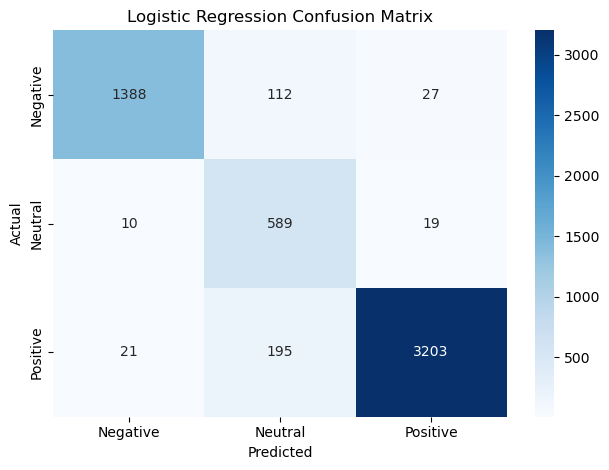

In [37]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
#positive is taking the lead and will confuse my model,will need to balance the data

In [38]:
#USING SMOTE to balance my label
#Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

#  Define X and y 
X = tfidf.fit_transform(df['clean_review'])  # TF-IDF feature matrix
y = df['label']  # Target variable (already label encoded)

#  Split my data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Check class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({2: 13676, 0: 6109, 1: 2471})
After SMOTE: Counter({2: 13676, 0: 13676, 1: 13676})


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
fav_model = LogisticRegression(max_iter=1000, random_state=42)
fav_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_lr = fav_model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))


Logistic Regression Results:
[[1389  110   28]
 [  11  587   20]
 [  18  192 3209]]
              precision    recall  f1-score   support

    Negative       0.98      0.91      0.94      1527
     Neutral       0.66      0.95      0.78       618
    Positive       0.99      0.94      0.96      3419

    accuracy                           0.93      5564
   macro avg       0.88      0.93      0.89      5564
weighted avg       0.95      0.93      0.94      5564



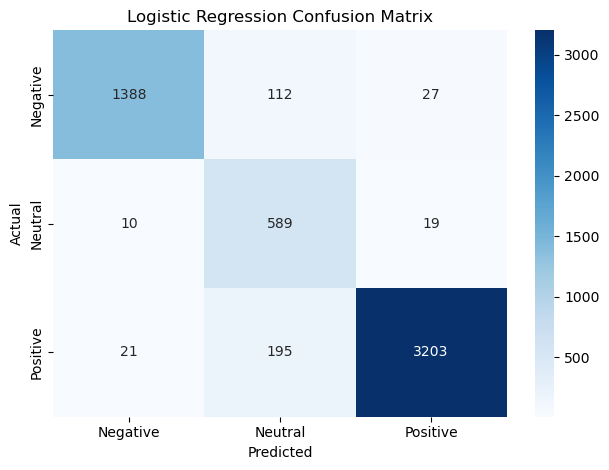

In [40]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
#even after using smote i am getting the same result

In [41]:
#using Naive Bayes to train my model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Training my model using Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)


MultinomialNB()

In [42]:

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Results:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))


Naive Bayes Results:
[[1392  120   15]
 [  11  593   14]
 [  23  315 3081]]
              precision    recall  f1-score   support

    Negative       0.98      0.91      0.94      1527
     Neutral       0.58      0.96      0.72       618
    Positive       0.99      0.90      0.94      3419

    accuracy                           0.91      5564
   macro avg       0.85      0.92      0.87      5564
weighted avg       0.94      0.91      0.92      5564



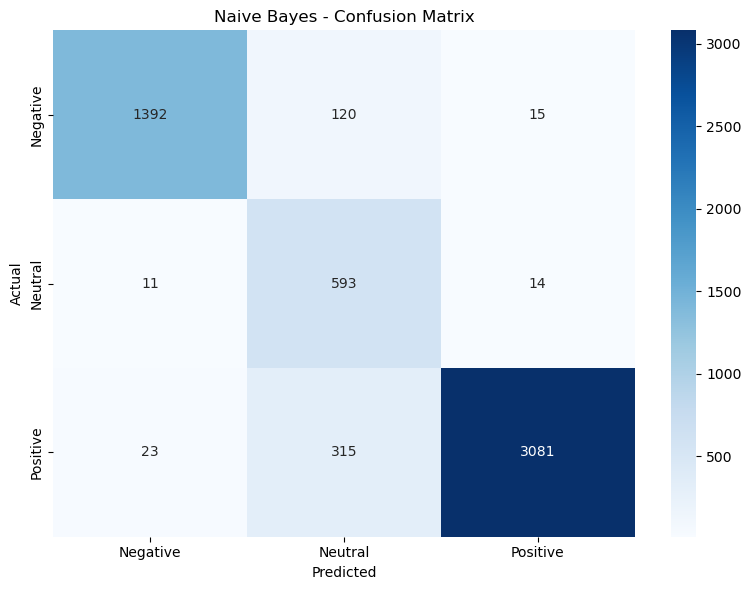

In [43]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
labels = label_encoder.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes - Confusion Matrix')
plt.tight_layout()
plt.show()


In [44]:
#MANUEL TUNING USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [45]:
#  Random Forest 
rf_model = RandomForestClassifier(
    n_estimators=50,           
    max_depth=10,              # Limit tree depth to avoid overfitting 
    min_samples_split=5,       # Don't split unless at least 5 samples
    min_samples_leaf=2,        # Each leaf should have at least 2 samples
    class_weight='balanced',   # Handle imbalance
    random_state=42,
    n_jobs=-1                  # Use all CPU cores efficiently
)

# Fit the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf_model.predict(X_test)




In [46]:
# Evaluate
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
#F1 SCORE IS BALANCE

Random Forest Results:
[[1377   81   69]
 [   7  568   43]
 [  11  133 3275]]
              precision    recall  f1-score   support

    Negative       0.99      0.90      0.94      1527
     Neutral       0.73      0.92      0.81       618
    Positive       0.97      0.96      0.96      3419

    accuracy                           0.94      5564
   macro avg       0.89      0.93      0.91      5564
weighted avg       0.95      0.94      0.94      5564



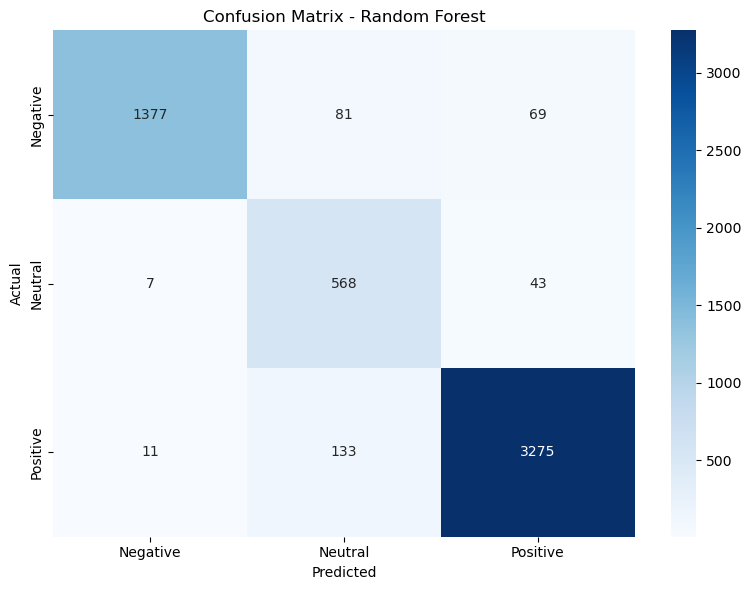

In [47]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [48]:
pip install joblib

In [49]:
import joblib

# Save my model 
joblib.dump(rf_model, 'random_forest_sentiment.pkl')


['random_forest_sentiment.pkl']

In [50]:
# Save tf-idf vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']